In [21]:
from IPython.display import display, HTML
display(HTML('<span style="color: deeppink; font-size: 50px;">Lab 3</span>'))
display(HTML('<span style="color: deeppink; font-size: 40px;">Gruppe slay</span>'))

**Målinger**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#hente fra fil
with open('data/eggan1.txt', 'r') as f:
#with open('data/eggan2.txt', 'r') as f:
#with open('data/eggan25.txt', 'r') as f:
#with open('data/eggan26.txt', 'r') as f:
#with open('data/eggan28.txt', 'r') as f:
    r = []
    g = []
    b = []
    
    lines = f.readlines()
    for i in range(3, len(lines)):
        line = lines[i].split(' ')
        r.append(float((line[0]).strip()))
        g.append(float((line[1]).strip()))
        b.append(float((line[2]).strip()))

g = signal.detrend(g)
t = np.arange(0,10, 10/len(g))

g_hann = np.hanning(len(g))*g

n_pad = 2**15
g_pad = np.pad(g_hann, (0, n_pad - len(g)), 'constant')
    
autocorr = np.correlate(g_pad, g_pad, mode='full')  
lags = np.arange(-n_pad + 1, n_pad,1) 

fft = np.fft.fft(g_pad, n_pad)
freq = np.fft.fftfreq(n_pad)
    
for i in range(-5, 5):
    autocorr[n_pad + i] = 0
    
index = np.argmax(autocorr)
puls = 30*60/lags[index]

puls_fft = 30*60*freq[np.argmax(fft)]
print("Puls med autokorrelasjon: ", abs(puls))
print("Puls med FFT: ", abs(puls_fft))

Puls med autokorrelasjon:  78.26086956521739
Puls med FFT:  80.035400390625


![Tabell resultater](tabell.png)

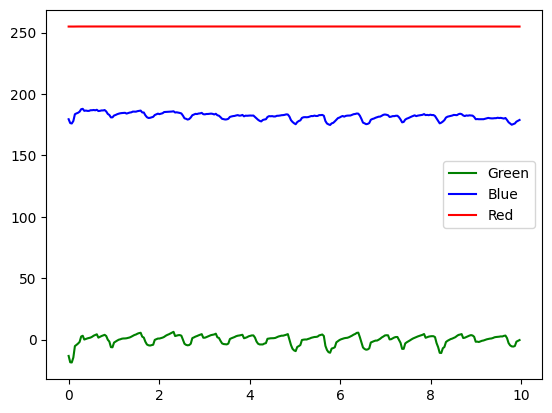

In [23]:
plt.plot(t, g, color = "green", label = "Green")
plt.plot(t, b, color = "blue", label = "Blue")
plt.plot(t, r, color = "red", label = "Red")
#plt.plot(freq*30*60, np.abs(fft))
#plt.plot(lags, autocorr)
#plt.xlim(0,200)
plt.legend()
plt.show()

## **STD**

In [24]:
import numpy as np

puls = [80.035, 79.959, 83.606, 88.165, 94.373]
puls_auto = [78.26, 75, 81.818, 81.818, 90]
puls_klokke = [80, 75, 80, 85, 85] 

puls_klokke_snitt = 0

for i in range(len(puls_klokke)):
    puls_klokke_snitt += puls_klokke[i]/len(puls_klokke)

#std med std funk:
puls_std1 = np.std(puls)

#std regne ut:
puls_var = 0

for i in range(len(puls)):
    puls_var += (puls[i]-puls_klokke_snitt)**2/len(puls)
    
puls_std2 = np.sqrt(puls_var)

print("Standardavvik funnet med np.std(): ", puls_std1)
print("Gjennomsnittelig puls målt med klokke: ", puls_klokke_snitt)
print("Standardavvik: ", puls_std2)

Standardavvik funnet med np.std():  5.470237420807257
Gjennomsnittelig puls målt med klokke:  81.0
Standardavvik:  6.913472296899731


## **SNR**

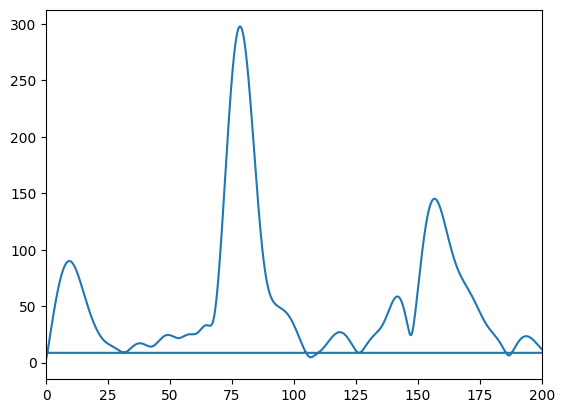

SNR:  7.1292308620321645
Puls med autokorrelasjon:  78.26086956521739
Puls med FFT:  80.035400390625


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

with open('data/eggan1.txt', 'r') as f:
    r = []
    g = []
    b = []
    
    lines = f.readlines()
    for i in range(3, len(lines)):
        line = lines[i].split(' ')
        r.append(float((line[0]).strip()))
        g.append(float((line[1]).strip()))
        b.append(float((line[2]).strip()))

g = signal.detrend(g)
t = np.arange(0,10, 10/len(g))

g_hann = np.hanning(len(g))*g

n_pad = 2**16
g_pad = np.pad(g_hann, (0, n_pad - len(g)), 'constant')
    
autocorr = np.correlate(g_pad, g_pad, mode='full')  
lags = np.arange(-n_pad + 1, n_pad,1) 

fft = np.fft.fft(g_pad, n_pad)
freq = np.fft.fftfreq(n_pad)
    
# plt.plot(t, g, color = "green")
# plt.plot(t, b, color = "blue")
# plt.plot(t, r, color = "red")
plt.plot(freq*30*60, np.abs(fft))
#plt.plot(lags, autocorr)
plt.xlim(0,200)
plt.show()

støy = fft.tolist()

for i in range(2914-20, 2914+20):
    støy.pop(i)

std_støy = abs(np.std(støy))
max_signal = abs(np.max(fft))

SNR = max_signal/std_støy


print("SNR: ", SNR)



for i in range(-5, 5):
    autocorr[n_pad + i] = 0
    
index = np.argmax(autocorr)
puls = 30*60/lags[index]

puls_fft = 30*60*freq[np.argmax(fft)]
print("Puls med autokorrelasjon: ", abs(puls))
print("Puls med FFT: ", abs(puls_fft))

## **Robusthetstester**
As a matter of fact har begge to *iskalde fingre* at all times :) 
Ergo, har vi tatt 2947913802 x målinger med iskalde fingre, og dette gir resultater som enten indikerer at vi har *tatt kvelden*, eller har et *massivt hjerteinfarkt*:

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import display, HTML

#hente fra fil
with open('outputny/vigiropp.txt', 'r') as f:
    r = []
    g = []
    b = []
    
    lines = f.readlines()
    for i in range(3, len(lines)):
        line = lines[i].split(' ')
        r.append(float((line[0]).strip()))
        g.append(float((line[1]).strip()))
        b.append(float((line[2]).strip()))

g = signal.detrend(g)
t = np.arange(0,10, 10/len(g))

g_hann = np.hanning(len(g))*g

n_pad = 2**15
g_pad = np.pad(g_hann, (0, n_pad - len(g)), 'constant')
    
autocorr = np.correlate(g_pad, g_pad, mode='full')  
lags = np.arange(-n_pad + 1, n_pad,1) 

fft = np.fft.fft(g_pad, n_pad)
freq = np.fft.fftfreq(n_pad)
    
for i in range(-5, 5):
    autocorr[n_pad + i] = 0
    
index = np.argmax(autocorr)
puls = 30*60/lags[index]

puls_fft = 30*60*freq[np.argmax(fft)]
print("Puls med autokorrelasjon: ", abs(puls))
print("Puls med FFT: ", abs(puls_fft))
# display(HTML('<span style="color: red;">Ring 113</span>'))

Puls med autokorrelasjon:  360.0
Puls med FFT:  13.677978515625


In [27]:
from IPython.display import display, HTML

display(HTML('<span style="color: red; font-size: 40px;">Ring 113</span>'))

**Håndledd og reflektans**

In [28]:
with open('outputny/6.txt', 'r') as f:
    r = []
    g = []
    b = []
    
    lines = f.readlines()
    for i in range(3, len(lines)):
        line = lines[i].split(' ')
        r.append(float((line[0]).strip()))
        g.append(float((line[1]).strip()))
        b.append(float((line[2]).strip()))

g = signal.detrend(g)
t = np.arange(0,10, 10/len(g))

g_hann = np.hanning(len(g))*g

n_pad = 2**16
g_pad = np.pad(g_hann, (0, n_pad - len(g)), 'constant')
    
autocorr = np.correlate(g_pad, g_pad, mode='full')  
lags = np.arange(-n_pad + 1, n_pad,1) 

fft = np.fft.fft(g_pad, n_pad)
freq = np.fft.fftfreq(n_pad)
    
# plt.plot(t, g, color = "green")
# plt.plot(t, b, color = "blue")
# plt.plot(t, r, color = "red")
# plt.plot(freq*30*60, np.abs(fft))
#plt.plot(lags, autocorr)
# plt.xlim(0,200)
# plt.show()

støy = fft.tolist()

for i in range(2914-20, 2914+20):
    støy.pop(i)

std_støy = abs(np.std(støy))
max_signal = abs(np.max(fft))

SNR = max_signal/std_støy


print("SNR: ", SNR)



for i in range(-5, 5):
    autocorr[n_pad + i] = 0
    
index = np.argmax(autocorr)
puls = 30*60/lags[index]

puls_fft = 30*60*freq[np.argmax(fft)]
print("Puls med autokorrelasjon: ", abs(puls))
print("Puls med FFT: ", abs(puls_fft))

SNR:  6.635926699917256
Puls med autokorrelasjon:  72.0
Puls med FFT:  72.454833984375
